In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os, sys
#os.listdir(os.getcwd())
#os.chdir('gdrive')
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.listdir(os.getcwd())
#os.getcwd()

['type1cm.zip',
 'type1cm.zip.1',
 'dmref',
 '1d-example_2fidelities.ipynb',
 'high_fidelity_simulations',
 'low_fidelity_simulations',
 '2d-example_3fidelities.ipynb',
 'Copy of Perdikaris.ipynb',
 'surface_plot.png',
 'mean_low_response.png',
 'mean_high_response.png',
 'observations.png',
 'variance_high_fidelity.png',
 'prediction_and_observations.png',
 'std_error.png',
 'prediction_vs_observations.png',
 'correlations.png',
 'Perdikaris.ipynb',
 'project.ipynb',
 'surface_plot.eps',
 'mean_high_response.eps',
 'mean_low_response.eps',
 'variance_high_fidelity.eps',
 'observations.eps',
 'std_error.eps',
 'prediction_and_observations.eps',
 'prediction_vs_observations.eps',
 'correlations.eps',
 'Perdikaris clean version for paper.ipynb']

In [4]:
pip install GPy

     |████████████████████████████████| 1.0MB 6.6MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp27-cp27mu-linux_x86_64.whl size=2546386 sha256=b5efb9852db372e4ba1167049cca95d4d6a9d4b336ceb8b2def247687f383aab
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp27-none-any.whl size=102552 sha256=21bee425e14895a570f06b3ebce9aa1da9ea1759ef7ead459b8931d769d49545
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [5]:
# importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
from dmref import MFGP
import matplotlib.mlab as ml
import warnings
warnings.filterwarnings("ignore")

# importing needed libraries
np.random.seed(11)

In [6]:
import re
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.chdir('high_fidelity_simulations')

filenames= os.listdir (".") # get all files' and folders' names in the current directory
folder_names = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        folder_names.append(filename)
        
#foldernames.sort()
print folder_names
Xh = np.empty((0, 2))
Yh = np.empty((0, 1))
for i in range(0, len(folder_names)):
#for i in range(0, 2):
  os.chdir(folder_names[i])

  name = [float(s) for s in re.findall(r'-?\d+\.?\d*',folder_names[i])]
  omega = name[0]
  Ca = name[1]
  #if omega>1 or Ca>2:
  if Ca==0.25:
    pass
  else:
    #Xh = np.append(Xh, np.array([[omega, Ca]]), axis=0)
    Xh = np.append(Xh, np.array([[omega, Ca]]), axis=0)

    mean = np.loadtxt('mean.dat')
  #if omega>1 or Ca>2:
    #pass
  #elif omega!=0:
    if omega!=0:
      first_value = int(mean[-1,0]-2*np.pi/omega)            
      finding_vector = mean[:,0].astype(int)
      first_index = np.where((finding_vector)==first_value)
      focusing_distance = np.mean(mean[first_index[-1][-1]:-1,1])
      Yh = np.append(Yh, np.array([[focusing_distance]]), axis=0)
    else:
      focusing_distance = mean[-1, 1]
      Yh = np.append(Yh, np.array([[focusing_distance]]), axis=0)
  
  os.chdir('..')

print 'Xh=', Xh
print 'Yh=', Yh
print Xh.shape
print Yh.shape

['w=0.1_Ca=10_Re=10', 'w=0.5_Ca=10_Re=10', 'w=0_Ca=1.67_Re=10', 'w=0.1_Ca=1.67_Re=10', 'w=0.5_Ca=1.67_Re=10', 'w=1_Ca=1.67_Re=10', 'w=0_Ca=1_Re=10', 'w=0.1_Ca=1_Re=10', 'w=1_Ca=1_Re=10', 'w=0_Ca=0.5_Re=10', 'w=0.01_Ca=0.5_Re=10', 'w=0.1_Ca=0.5_Re=10', 'w=1_Ca=0.5_Re=10', 'w=0_Ca=0.33_Re=10', 'w=0.1_Ca=0.33_Re=10', 'w=0_Ca=0.25_Re=10', 'w=0.1_Ca=0.25_Re=10', 'w=0_Ca=0.09_Re=10', 'w=0.01_Ca=0.09_Re=10', 'w=0.1_Ca=0.09_Re=10', 'w=1_Ca=0.09_Re=10', 'w=0.5_Ca=0.33_Re=10', 'w=0.5_Ca=0.09_Re=10', 'w=0.5_Ca=0.5_Re=10']
Xh= [[ 0.1  10.  ]
 [ 0.5  10.  ]
 [ 0.    1.67]
 [ 0.1   1.67]
 [ 0.5   1.67]
 [ 1.    1.67]
 [ 0.    1.  ]
 [ 0.1   1.  ]
 [ 1.    1.  ]
 [ 0.    0.5 ]
 [ 0.01  0.5 ]
 [ 0.1   0.5 ]
 [ 1.    0.5 ]
 [ 0.    0.33]
 [ 0.1   0.33]
 [ 0.    0.09]
 [ 0.01  0.09]
 [ 0.1   0.09]
 [ 1.    0.09]
 [ 0.5   0.33]
 [ 0.5   0.09]
 [ 0.5   0.5 ]]
Yh= [[0.13821646]
 [0.18312037]
 [0.26307677]
 [0.26963755]
 [0.27324502]
 [0.26320391]
 [0.31362263]
 [0.31726111]
 [0.30680698]
 [0.37896151]
 [0.

In [7]:
import re
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.chdir('low_fidelity_simulations')

filenames= os.listdir (".") # get all files' and folders' names in the current directory
folder_names = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        folder_names.append(filename)
        
#foldernames.sort()
print folder_names
Xl = np.empty((0, 2))
Yl = np.empty((0, 1))
for i in range(0, len(folder_names)):
#for i in range(0, 2):
  os.chdir(folder_names[i])

  name = [float(s) for s in re.findall(r'-?\d+\.?\d*',folder_names[i])]
  omega = name[0]
  Ca = name[1]
  #if omega>1 or Ca>2:
  if Ca==0.25:
    pass
  else:
    #Xl = np.append(Xl, np.array([[omega, Ca]]), axis=0)
    Xl = np.append(Xl, np.array([[omega, Ca]]), axis=0)

    mean = np.loadtxt('mean.dat')
  #if omega>1 or Ca>2:
      #pass
  #elif omega!=0:
    if omega!=0:
      first_value = int(mean[-1,0]-2*np.pi/omega)            
      finding_vector = mean[:,0].astype(int)
      first_index = np.where((finding_vector)==first_value)
      focusing_distance = np.mean(mean[first_index[-1][-1]:-1,1])
      Yl = np.append(Yl, np.array([[focusing_distance]]), axis=0)
    else:
      focusing_distance = mean[-1, 1]
      Yl = np.append(Yl, np.array([[focusing_distance]]), axis=0)
  
  os.chdir('..')

print 'Xl=', Xl
print 'Yl=', Yl
print Yl.shape
print Xl.shape

['w=0.1_Ca=10_Re=10', 'w=0.5_Ca=10_Re=10', 'w=0_Ca=1_Re=10', 'w=0.01_Ca=1_Re=10', 'w=0.1_Ca=1_Re=10', 'w=0.5_Ca=1_Re=10', 'w=1_Ca=1_Re=10', 'w=2_Ca=1_Re=10', 'w=8_Ca=1_Re=10', 'w=0.1_Ca=1.67_Re=10', 'w=0_Ca=0.5_Re=10', 'w=0.01_Ca=0.5_Re=10', 'w=0.1_Ca=0.5_Re=10', 'w=0.5_Ca=0.5_Re=10', 'w=0.1_Ca=0.33_Re=10', 'w=0.1_Ca=0.25_Re=10', 'w=0.1_Ca=0.09_Re=10', 'w=0.01_Ca=1.67_Re=10', 'w=0_Ca=1.67_Re=10', 'w=0.5_Ca=1.67_Re=10', 'w=1_Ca=1.67_Re=10', 'w=0_Ca=0.09_Re=10', 'w=0.01_Ca=0.09_Re=10', 'w=1_Ca=0.5_Re=10', 'w=1_Ca=0.09_Re=10', 'w=0_Ca=0.25_Re=10', 'w=0_Ca=0.33_Re=10', 'w=0.5_Ca=0.09_Re=10', 'w=0.5_Ca=0.25_Re=10', 'w=0.5_Ca=0.33_Re=10', 'w=2_Ca=1.67_Re=10', 'w=8_Ca=1.67_Re=10']
Xl= [[ 0.1  10.  ]
 [ 0.5  10.  ]
 [ 0.    1.  ]
 [ 0.01  1.  ]
 [ 0.1   1.  ]
 [ 0.5   1.  ]
 [ 1.    1.  ]
 [ 2.    1.  ]
 [ 8.    1.  ]
 [ 0.1   1.67]
 [ 0.    0.5 ]
 [ 0.01  0.5 ]
 [ 0.1   0.5 ]
 [ 0.5   0.5 ]
 [ 0.1   0.33]
 [ 0.1   0.09]
 [ 0.01  1.67]
 [ 0.    1.67]
 [ 0.5   1.67]
 [ 1.    1.67]
 [ 0.    0.09

In [ ]:
import GPy
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

import time

np.random.seed(11)

def rmse(pred, truth):
    pred = pred.flatten()
    truth = truth.flatten()
    return np.sqrt(np.mean((pred-truth)**2))


''' Create training set '''
#N1 = 80
#N2 = 40
#N3 = 20

plot = 1
save = 0

dim = 2
#lb = np.array([-5.0, 0.0])
#ub = np.array([10.0, 15.0])

#tmp = np.random.rand(1000,dim)
#Xtrain = scale_range(tmp,ub,lb)
#idx = np.random.permutation(1000)
#X1 = Xtrain[idx[0:N1], :]
#X2 = Xtrain[idx[0:N2], :]
#X3 = Xtrain[idx[0:N3], :]

#Y1 = low(X1)[:,None]
#Y2 = medium(X2)[:,None]
#Y3 = high(X3)[:,None]

#nn = 40
#lb = np.array([-5.0, 0.0])
#ub = np.array([10.0, 15.0])
#x1 = np.linspace(lb[0], ub[0], 100)
#x2 = np.linspace(lb[1], ub[1], 100)
nx1=100
nx2=100
x1 = np.linspace(0, 1, nx1)
x2 = np.linspace(0.09, 1.67, nx2)
x1, x2 = np.meshgrid(x1, x2)

#tmp = np.random.rand(1000,2)
#Xtest = scale_range(tmp,ub,lb)
Xtest = np.hstack([x1.flatten()[:, None], x2.flatten()[:, None]])
ntest = Xtest.shape[0]

#Exact = high(Xtest)
#Medium = medium(Xtest)
#Low = low(Xtest)

#Exactplot = ml.griddata(Xtest[:,0],Xtest[:,1], Exact, X, Y, interp = 'linear')
#Medplot = ml.griddata(Xtest[:,0],Xtest[:,1], Medium, X, Y, interp = 'linear')
#Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], Low, X, Y, interp = 'linear')

active_dimensions = np.arange(0,dim)

# if plot == 1:
#     fig = plt.figure(1)
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, Exactplot, color = '#377eb8', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)
#     ax.plot_surface(X, Y, Medplot, color = 'magenta', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)
#     ax.plot_surface(X, Y, Lowplot, color = 'green', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)

#     fig = plt.figure(2)
#     plt.pcolor(X, Y, Exactplot, cmap='jet')
#     plt.colorbar()

#     fig = plt.figure(3)
#     plt.plot(Low,Exact,'.')

#     fig = plt.figure(4)
#     plt.plot(Medium,Exact,'.')

#     fig = plt.figure(5)
#     plt.plot(Low,Medium,'.')

start = time.time()

''' Train level 1 '''
k1 = GPy.kern.RBF(dim, ARD = True)
m1 = GPy.models.GPRegression(X=Xl, Y=Yl, kernel=k1)

m1[".*Gaussian_noise"] = m1.Y.var()*0.01
m1[".*Gaussian_noise"].fix()

m1.optimize(max_iters = 500)

m1[".*Gaussian_noise"].unfix()
m1[".*Gaussian_noise"].constrain_positive()

m1.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000, verbose = 0)

mu1, v1 = m1.predict(Xh)


''' Train level 2 '''
XX = np.hstack((Xh, mu1))

k2 = GPy.kern.RBF(1, active_dims = [dim])*GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True) \
    + GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True)

m2 = GPy.models.GPRegression(X=XX, Y=Yh, kernel=k2)

m2[".*Gaussian_noise"] = m2.Y.var()*0.01
m2[".*Gaussian_noise"].fix()

m2.optimize(max_iters = 500)

m2[".*Gaussian_noise"].unfix()
m2[".*Gaussian_noise"].constrain_positive()

m2.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000, verbose = 0)



''' Predict at test points '''
# sample f_1 at xtest
nsamples = 1000
mu1, C1 = m1.predict(Xtest, full_cov=True)
Z = np.random.multivariate_normal(mu1.flatten(),C1,nsamples)

# push samples through f_2
tmp_m = np.zeros((nsamples,ntest))
tmp_v = np.zeros((nsamples,ntest))
for i in range(0,nsamples):
    mu, v = m2.predict(np.hstack((Xtest, Z[i,:][:,None])))
    tmp_m[i,:] = mu.flatten()
    tmp_v[i,:] = v.flatten()

# get posterior mean and variance
mean = np.mean(tmp_m, axis = 0)[:,None]
var = np.mean(tmp_v, axis = 0)[:,None]+ np.var(tmp_m, axis = 0)[:,None]
var = np.abs(var)

#error = np.linalg.norm(Exact - mean)/np.linalg.norm(Exact)
#print "N1 = %d, N2 = %d, sample = %d, error = %e" % (N1, N2[ii], jj+1, error)

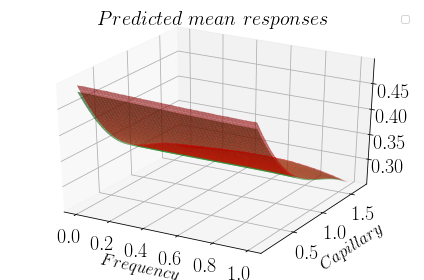

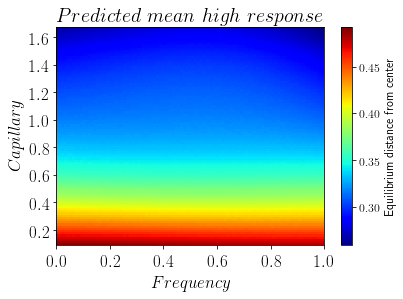

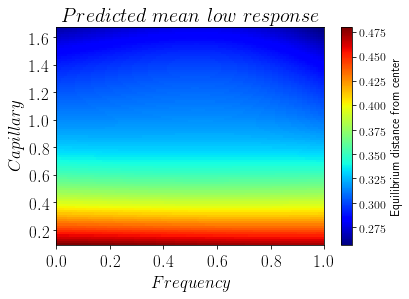

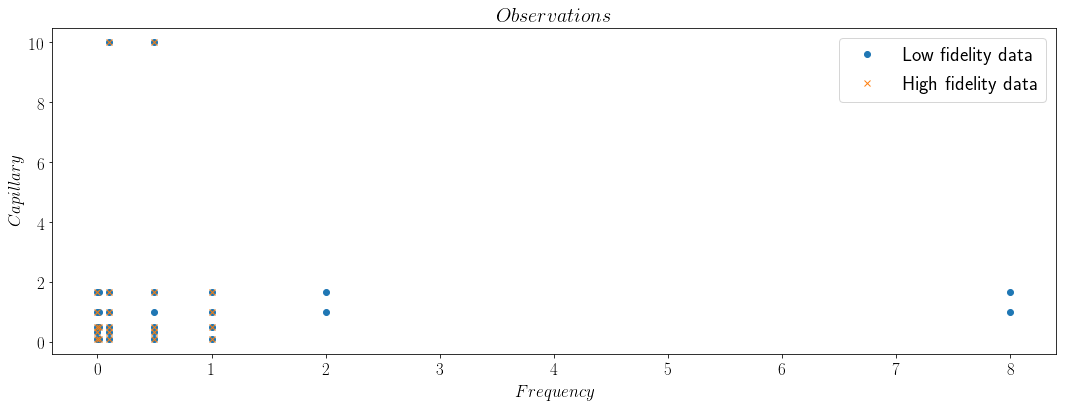

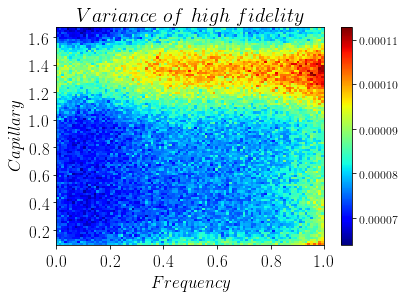

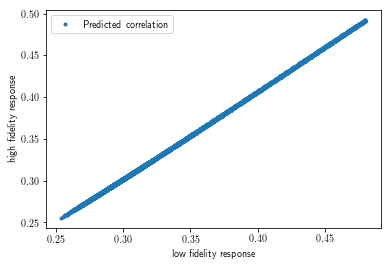

(array([0]), array([0]))
(array([99]), array([0]))


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_surface(X, Y, Exactplot, color = '#377eb8', rstride=2, cstride=2,
    #                                linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    #ax.plot_surface(X, Y, Medplot, color = 'magenta', rstride=2, cstride=2,
     #                               linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Lowplot, color = 'green', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Highplot, color = 'red', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    
    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(1)
    plt.title('$Predicted \ mean  \ responses$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17, labelpad = 10)
    plt.ylabel('$Capillary$', fontsize=17, labelpad = 10)
    #ax.set_zlabel('Distance', fontsize=30, rotation=0, labelpad=15)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.tick_params(axis="z", labelsize=20)
    plt.tight_layout()
    plt.legend()
    #ali = os.getcwd()
    #print ali
    plt.savefig('surface_plot.eps')
    #fig = plt.figure(2)
    #plt.pcolor(X, Y, Exactplot, cmap='jet')
    #plt.colorbar()

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(2)
    plt.pcolor(x1, x2, Highplot, cmap='jet')
    #plt.plot(Xh[:,0], Xh[:,1], marker='o', linestyle = '')
    #plt.colorbar()
    cb = plt.colorbar()
    cb.set_label(label='Equilibrium distance from center', size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Predicted \ mean  \ high \ response$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('mean_high_response.eps', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(3)
    plt.pcolor(x1, x2, Lowplot, cmap='jet')
    #plt.plot(Xl[:,0], Xl[:,1], marker='o', linestyle = '')
    cb = plt.colorbar()
    cb.set_label(label='Equilibrium distance from center', size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Predicted \ mean  \ low \ response$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('mean_low_response.eps', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(4)
    fig = plt.figure(figsize=(18,6))
    plt.plot(Xl[:,0], Xl[:,1], marker='o', linestyle = '', label='Low fidelity data')
    plt.plot(Xh[:,0], Xh[:,1], marker='x', linestyle = '', label='High fidelity data')
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.title('$Observations$',fontsize=20)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.legend(fontsize = 20)
    plt.savefig('observations.eps', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(4)
    #plt.pcolor(X, Y, GPplot, cmap='jet')
    #plt.plot(X2[:,0], X2[:,1], marker='o', linestyle = '')
    #plt.colorbar()

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(5)
    plt.pcolor(x1, x2, Varplot, cmap='jet')
    cb = plt.colorbar()
    #cb.set_label(size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Variance \ of  \ high \ fidelity$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('variance_high_fidelity.eps', bbox_inches = 'tight', pad_inches = 0)

    fig = plt.figure(6)
    #plt.plot(Low, Exact, '.', label = "Exact correlation")
    plt.plot(mu1, mean, '.', label = "Predicted correlation")
    plt.xlabel('low fidelity response')
    plt.ylabel('high fidelity response')
    plt.legend()

if (save == 1):
            np.savetxt("Branin_X1.txt", X1)
            np.savetxt("Branin_X2.txt", X2)
            np.savetxt("Branin_X3.txt", X3)
            np.savetxt("Branin_Y1.txt", Y1)
            np.savetxt("Branin_Y2.txt", Y2)
            np.savetxt("Branin_Y3.txt", Y3)
            np.savetxt("Branin_ARGP_mean.txt", mu3)
            np.savetxt("Branin_ARGP_var.txt", v3)
            np.savetxt("Branin_GP_mu4.txt", mu4)
            np.savetxt("Branin_GP_var.txt", v4)
            np.savetxt("Branin_Exact.txt", Exact)
            np.savetxt("Branin_Medium.txt", Medium)
            np.savetxt("Branin_Low.txt", Low)

# error = np.linalg.norm(Exact - mu3)/np.linalg.norm(Exact)
# print "error = %e" % (error)
plt.show()

#print Xtest[-nx2: , :]

#print np.max(mu1)
#print np.min(mu1)
#print np.max(mean)
#print np.min(mean)

#print mu1
#print mean

new_vector = np.zeros((nx2, 1))
new_vector_2 = np.zeros((nx2, 1))
#print Xp[0:3, :]
for i in range(0, nx2):
  new_vector[i] = mean[i*nx1]
#print new_vector
#print np.where(pred_high[0:nx1] == np.max(pred_high[0:nx1] ))
print np.where(new_vector == np.max(new_vector))
print np.where(new_vector == np.min(new_vector))

new_vector_2 = mean[-nx2:]
#print new_vector_2

In [8]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [9]:
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 2s (12.5 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 172334 files and directories currently installed.)
Preparing to unpack .../cm-super-minimal_0.3.4-11_all.deb ...
Unpacking cm-super-minimal (0.3.4-11) ...
Selectin

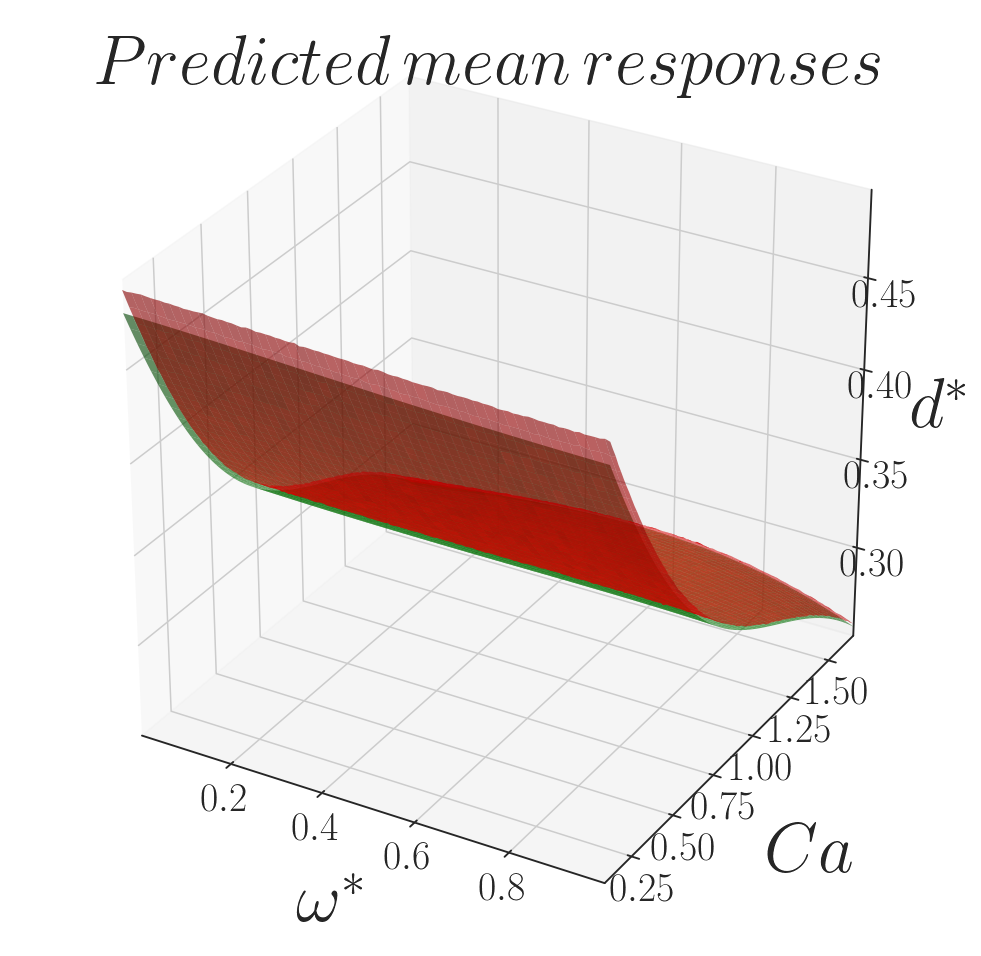

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')


def get_fix_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.
    
    return [mins, maxs]


os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    #fig = plt.figure(1)
    #ax = fig.add_subplot(111, projection='3d')
    fig , ax = plt.subplots(1,1,figsize = (17,17))
    ax = plt.axes(projection='3d')
    #ax.plot_surface(X, Y, Exactplot, color = '#377eb8', rstride=2, cstride=2,
    #                                linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    #ax.plot_surface(X, Y, Medplot, color = 'magenta', rstride=2, cstride=2,
     #                               linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Lowplot, color = 'green', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Highplot, color = 'red', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    
    #fig = plt.figure(figsize=(18,6))
    #fig = plt.figure(1)
    plt.title(r'$Predicted \, mean  \, responses$',fontsize=70)
    #plt.xlabel('$Frequency$', fontsize=17, labelpad = 10)
    #plt.ylabel('$Capillary$', fontsize=17, labelpad = 10)
    ax.set_xlabel(r'$\omega^*$', fontsize=70,  rotation=0, labelpad=45)
    ax.set_ylabel(r'$Ca$', fontsize=70, rotation=0, labelpad=62)
    ax.set_zlabel(r'$d^*$', fontsize=70, rotation=0, labelpad=33.5)
    #ax.set_zlabel('Distance', fontsize=30, rotation=0, labelpad=15)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.tick_params(axis="z", labelsize=40)
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)

    #plt.tight_layout()
    #plt.legend()
    #ax.xaxis.set_ticks(np.arange(0, 1.0, 0.2))
    minmax = get_fix_mins_maxs(-0.0, 1.0)
    ## Set each axis limits
    ax.set_xlim(minmax)
    minmax = get_fix_mins_maxs(0.09, 1.67)
    ax.set_ylim(minmax) 
    #ax.set_zlim(minmax)
    #plt.savefig('surface_plot.eps')
    plt.savefig('surface_plot.eps', bbox_inches = 'tight', pad_inches = 0)

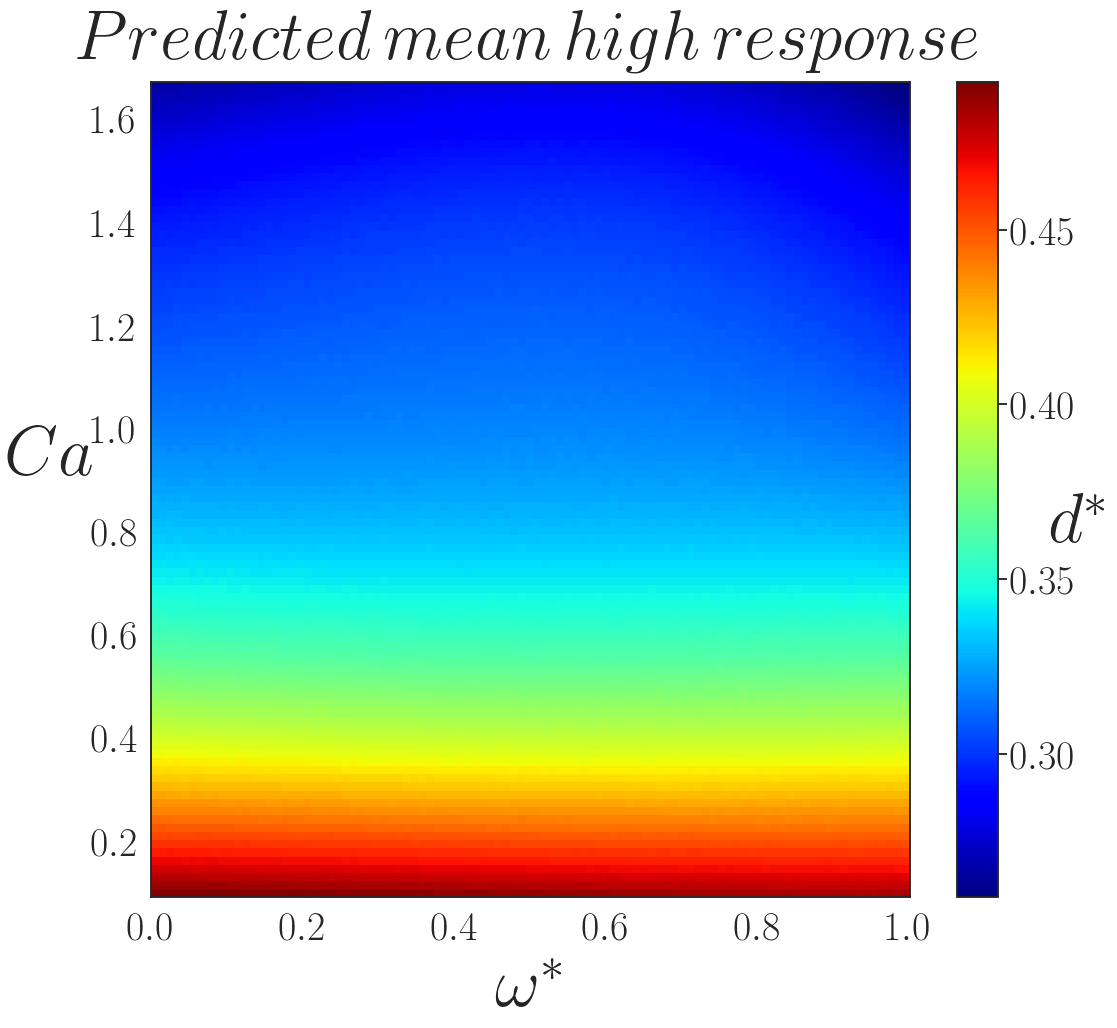

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    #fig = plt.figure(1)
    #ax = fig.add_subplot(111, projection='3d')
    fig , ax = plt.subplots(1,1,figsize = (17,15))
    
    #fig = plt.figure(2)
    plt.pcolor(x1, x2, Highplot, cmap='jet')
    #plt.plot(Xh[:,0], Xh[:,1], marker='o', linestyle = '')
    #plt.colorbar()
    cb = plt.colorbar()
    #cb.set_label(label=r'$d^*$', size='large')
    #cb.ax.tick_params(labelsize='large')
    cb.set_label(label=r'$d^*$', size=70, rotation = 0)
    cb.ax.tick_params(labelsize=40)
    plt.title(r'$Predicted \, mean  \, high \, response$',fontsize=70, y = 1.02)
    #plt.xlabel('$Frequency$', fontsize=70)
    #plt.ylabel('$Capillary$', fontsize=70)
    #plt.xticks(fontsize= 17)
    #plt.yticks(fontsize= 17)
    ax.set_xlabel(r'$\omega^*$', fontsize=70)
    ax.set_ylabel(r'$Ca$', fontsize=70, rotation = 0)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.yaxis.set_label_coords(-0.13, 0.5)
    #ax.xaxis.set_label_coords(0.5, -0.08)
    #plt.subplots_adjust( top=1.5, bottom=0.05, left=0.05, right=1.5 )
    plt.savefig('mean_high_response.eps', bbox_inches = 'tight', pad_inches = 0)

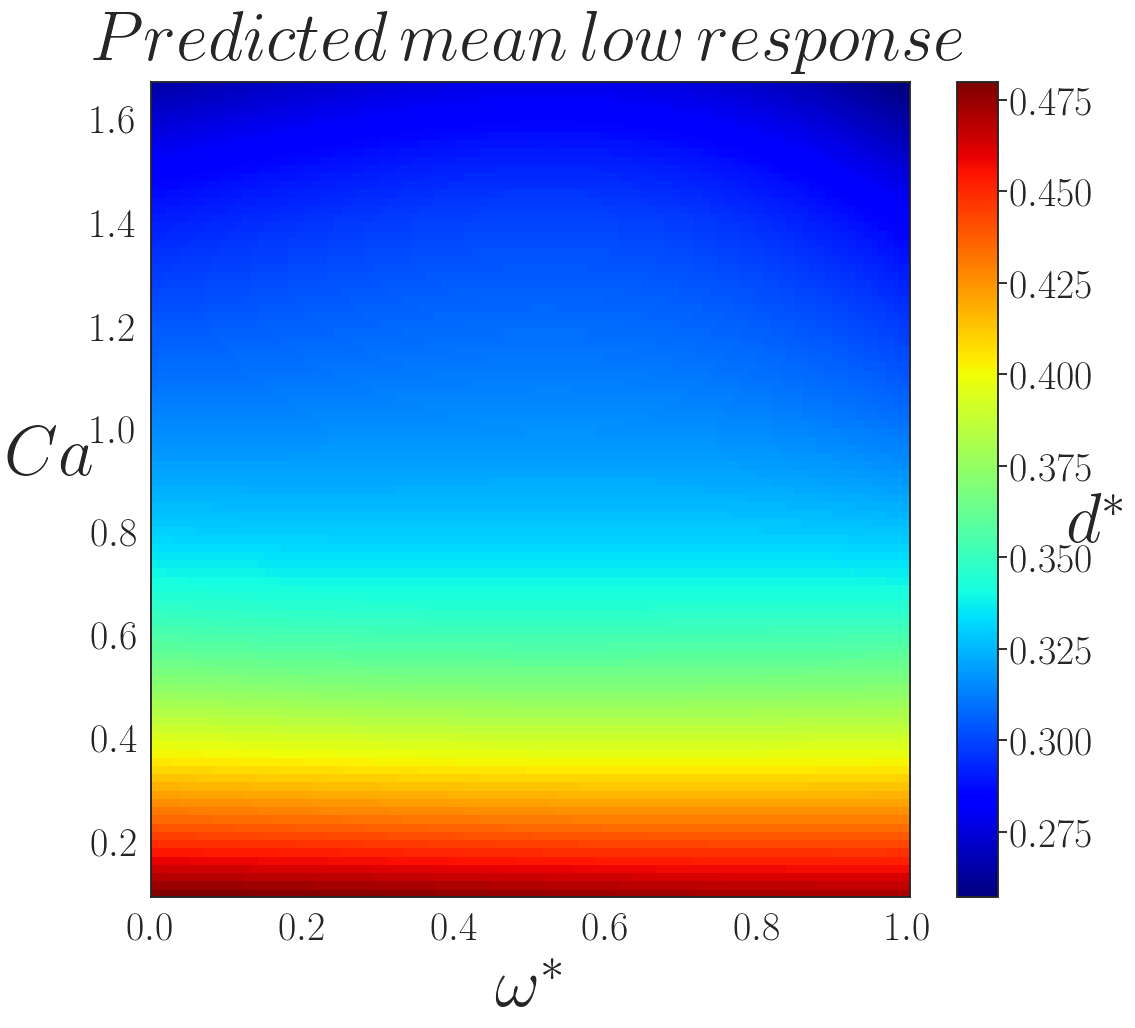

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    #fig = plt.figure(1)
    #ax = fig.add_subplot(111, projection='3d')
    fig , ax = plt.subplots(1,1,figsize = (17,15))
    
    #fig = plt.figure(2)
    plt.pcolor(x1, x2, Lowplot, cmap='jet')
    #plt.plot(Xh[:,0], Xh[:,1], marker='o', linestyle = '')
    #plt.colorbar()
    cb = plt.colorbar()
    #cb.set_label(label=r'$d^*$', size='large')
    #cb.ax.tick_params(labelsize='large')
    cb.set_label(label=r'$d^*$', size=70, rotation = 0)
    cb.ax.tick_params(labelsize=40)
    plt.title(r'$Predicted \, mean  \, low \, response$',fontsize=70, y=1.02)
    #plt.xlabel('$Frequency$', fontsize=70)
    #plt.ylabel('$Capillary$', fontsize=70)
    #plt.xticks(fontsize= 17)
    #plt.yticks(fontsize= 17)
    ax.set_xlabel(r'$\omega^*$', fontsize=70)
    ax.set_ylabel(r'$Ca$', fontsize=70, rotation = 0)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.yaxis.set_label_coords(-0.13, 0.5)
    #ax.xaxis.set_label_coords(0.5, -0.08)
    #plt.subplots_adjust( top=1.5, bottom=0.05, left=0.05, right=1.5 )
    plt.savefig('mean_low_response.eps', bbox_inches = 'tight', pad_inches = 0)

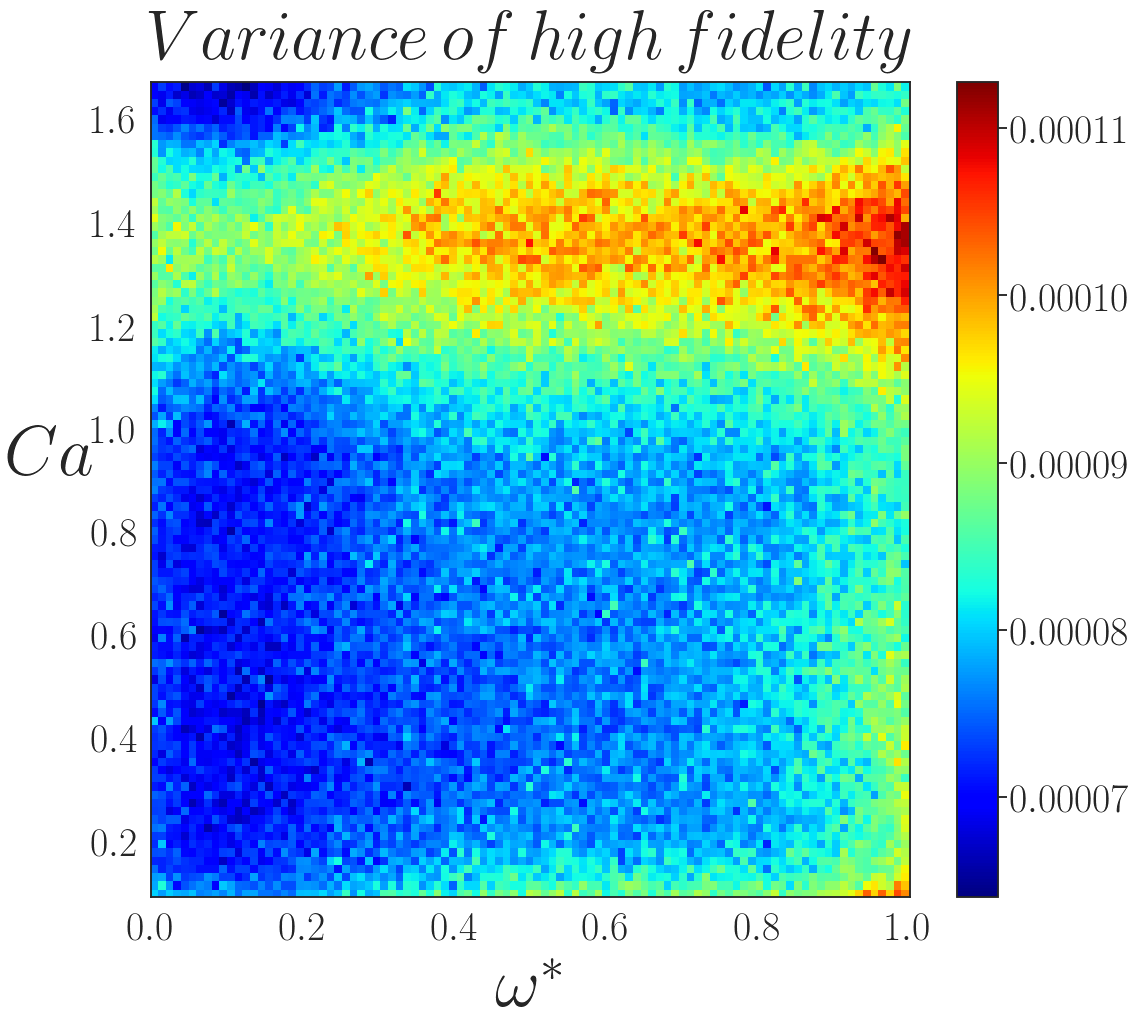

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    #fig = plt.figure(1)
    #ax = fig.add_subplot(111, projection='3d')
    fig , ax = plt.subplots(1,1,figsize = (17,15))
    
    #fig = plt.figure(2)
    plt.pcolor(x1, x2, Varplot, cmap='jet')
    #plt.plot(Xh[:,0], Xh[:,1], marker='o', linestyle = '')
    #plt.colorbar()
    cb = plt.colorbar()
    #cb.set_label(label=r'$d^*$', size='large')
    #cb.ax.tick_params(labelsize='large')
    #cb.set_label(label=r'$d^*$', size=70, rotation = 0)
    cb.ax.tick_params(labelsize=40)
    plt.title(r'$Variance \, of  \, high \, fidelity$',fontsize=70, y=1.02)
    #plt.xlabel('$Frequency$', fontsize=70)
    #plt.ylabel('$Capillary$', fontsize=70)
    #plt.xticks(fontsize= 17)
    #plt.yticks(fontsize= 17)
    ax.set_xlabel(r'$\omega^*$', fontsize=70)
    ax.set_ylabel(r'$Ca$', fontsize=70, rotation = 0)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.yaxis.set_label_coords(-0.13, 0.5)
    #ax.xaxis.set_label_coords(0.5, -0.08)
    #plt.subplots_adjust( top=1.5, bottom=0.05, left=0.05, right=1.5 )
    plt.savefig('variance_high_fidelity.eps', bbox_inches = 'tight', pad_inches = 0)

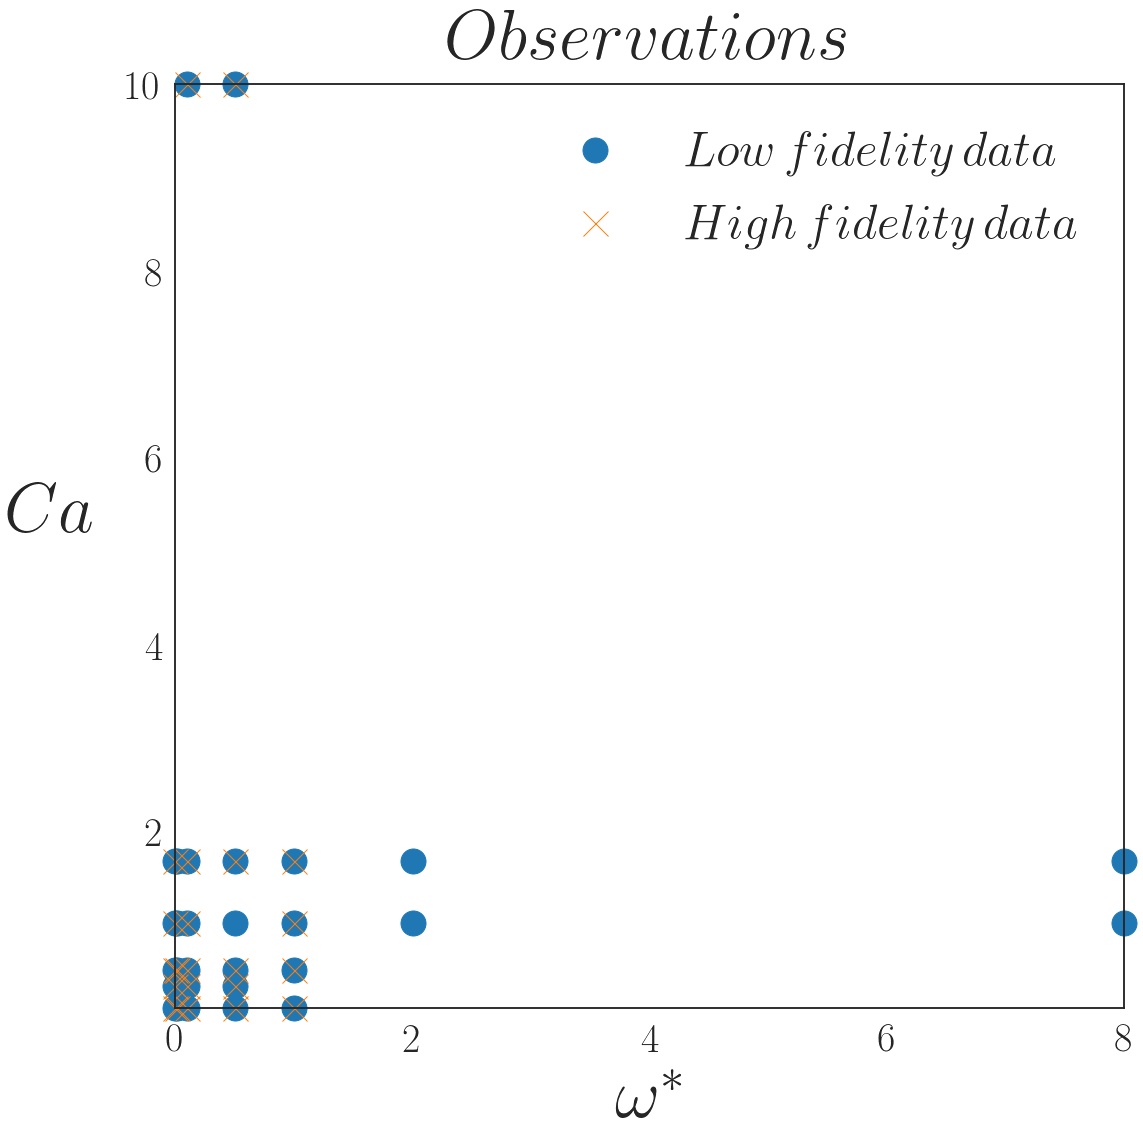

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    fig , ax = plt.subplots(1,1,figsize = (17,17))
    ax.plot(Xl[:,0], Xl[:,1], marker='o', markersize = 25, linestyle = '', clip_on = False, label=r'$Low \, fidelity \, data$')
    ax.plot(Xh[:,0], Xh[:,1], marker='x', markersize = 25, linestyle = '', clip_on = False, label=r'$High \, fidelity \, data$')
    plt.title(r'$Observations$',fontsize=70, y=1.02)
    ax.set_xlabel(r'$\omega^*$', fontsize=70)
    ax.set_ylabel(r'$Ca$', fontsize=70, rotation = 0)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.yaxis.set_label_coords(-0.13, 0.5)
    plt.xlim(0, 8)
    plt.ylim(0.09, 10)
    ax.legend(frameon=False,fontsize=50, ncol=1, loc='upper right')
    plt.savefig('observations.eps', bbox_inches = 'tight', pad_inches = 0)

In [24]:
number_of_bootstraps = 500
R2_vector = np.zeros(number_of_bootstraps )
MSE_vector = np.zeros(number_of_bootstraps )

weird_predictions = []
R2_weird = []

np.random.seed(11)

for j in range(0, number_of_bootstraps): 
  import random
  ''' Create training set '''
  training_size = 15
  train_indices = np.random.choice((Xh.shape[0]), training_size, replace=False)
  
  test_indices =  np.setdiff1d(np.arange(Xh.shape[0]), train_indices)
 
  Xh_train = Xh[train_indices, :]
  Yh_train = Yh[train_indices, :]
  Xh_test = Xh[test_indices, :]
  Yh_test = Yh[test_indices, :]
  

  # Prepare data for code
  import GPy
  import numpy as np
  from matplotlib import pyplot as plt
  import matplotlib.mlab as ml
  import matplotlib.patches as mpatches

  import time

  #np.random.seed(11)

  dim = 2

  ntest = Xh_test.shape[0]

  active_dimensions = np.arange(0,dim)

  start = time.time()

  ''' Train level 1 '''
  k1 = GPy.kern.RBF(dim, ARD = True)
  m1 = GPy.models.GPRegression(X=Xl, Y=Yl, kernel=k1)

  m1[".*Gaussian_noise"] = m1.Y.var()*0.01
  m1[".*Gaussian_noise"].fix()

  m1.optimize(max_iters = 500)

  m1[".*Gaussian_noise"].unfix()
  m1[".*Gaussian_noise"].constrain_positive()

  m1.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000, verbose = 0)

  mu1, v1 = m1.predict(Xh_train)


  ''' Train level 2 '''
  XX = np.hstack((Xh_train, mu1))

  k2 = GPy.kern.RBF(1, active_dims = [dim])*GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True) \
      + GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True)

  m2 = GPy.models.GPRegression(X=XX, Y=Yh_train, kernel=k2)

  m2[".*Gaussian_noise"] = m2.Y.var()*0.01
  m2[".*Gaussian_noise"].fix()

  m2.optimize(max_iters = 500)

  m2[".*Gaussian_noise"].unfix()
  m2[".*Gaussian_noise"].constrain_positive()

  m2.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000, verbose = 0)



  ''' Predict at test points '''
  # sample f_1 at xtest
  nsamples = 1000
  mu1, C1 = m1.predict(Xh_test, full_cov=True)
  Z = np.random.multivariate_normal(mu1.flatten(),C1,nsamples)

  # push samples through f_2
  tmp_m = np.zeros((nsamples,ntest))
  tmp_v = np.zeros((nsamples,ntest))
  for i in range(0,nsamples):
      mu, v = m2.predict(np.hstack((Xh_test, Z[i,:][:,None])))
      tmp_m[i,:] = mu.flatten()
      tmp_v[i,:] = v.flatten()

  # get posterior mean and variance
  mean = np.mean(tmp_m, axis = 0)[:,None]
  var = np.mean(tmp_v, axis = 0)[:,None]+ np.var(tmp_m, axis = 0)[:,None]
  var = np.abs(var)


  import scipy.stats as st
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns
  from sklearn.metrics import r2_score
  sns.set_context('talk')
  sns.set_style('white')

    # Now we would like to make some predictions
    # Namely, we wish to predict at this dense set of points:

  pred_high = mean
    
  pred_low = mu1
    

  mse = np.mean((Yh_test - pred_high) ** 2)
    
  MSE_vector[j] = mse

  #R2 = r2_score(pred_high, Yh_test)
  R2 = r2_score(Yh_test, pred_high)
    
  R2_vector[j] = R2
    
  if R2<0:
    weird_predictions.append(pred_high)
    R2_weird.append(R2)
  

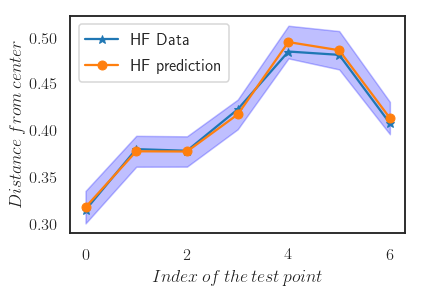

R2 for all 500 precditions: [ 0.99802991  0.99190938  0.99790657  0.99550062  0.9985142   0.99550092
  0.99750791  0.99903438  0.99705708  0.94418043  0.99051227  0.99837768
  0.94070807  0.97213496  0.99857413  0.99240779  0.99590738  0.99421685
 -0.86047228  0.97350878  0.99849278  0.9977635   0.99947798  0.99576124
  0.99332766  0.9967315   0.98780066  0.99284259  0.99371086  0.99830006
  0.99897568  0.99556206  0.99756544  0.99715901  0.99726151  0.99748796
  0.99801729  0.99629293  0.99602759  0.99668404  0.99698357  0.98375659
  0.99657631  0.96465094  0.99645086  0.99283556  0.99809721  0.91814599
  0.99890968  0.99712619  0.99582516  0.96991202  0.99843826  0.9966024
  0.99289543  0.9969986   0.99565995  0.99892849  0.99306573  0.99872358
  0.99320577  0.99865113  0.99367884  0.99592427  0.99848139  0.99303587
  0.99393804  0.99562835  0.99385824  0.99843764  0.99500566  0.99925157
  0.9952878   0.99531582  0.99611066  0.98927117  0.9948189   0.99454383
  0.9930847   0.99559909

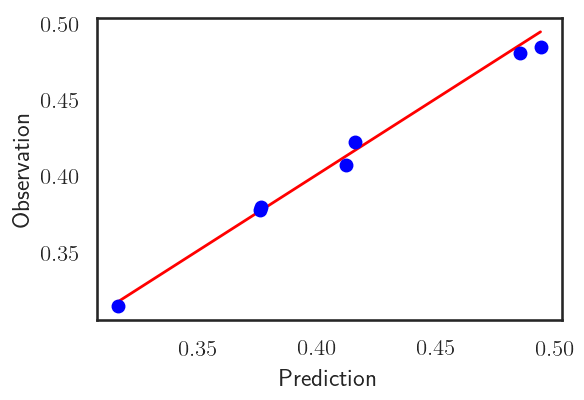

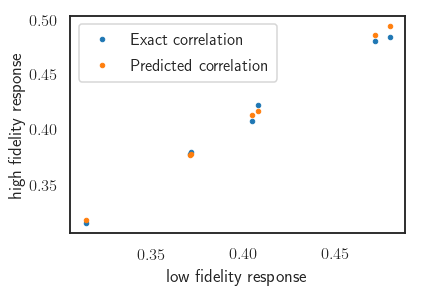

In [46]:
  fig, ax = plt.subplots()
  #markers = ['o', 'x']
  #colors = ['red', 'blue']
  #for y, yp, vp, c, mk in zip(Y, Yp, Vp, colors, markers):
  ax.plot(np.arange(Xh_test.shape[0]), Yh_test, marker='*')
  ax.plot(np.arange(Xh_test.shape[0]), pred_high, marker='o')
  sp = np.sqrt(var.flatten())
  #print pred_high
  #print Xh_train
  #print Xh_test
  #print Yh_test
  #print var.flatten()
  #print sp
  lp = pred_high.flatten() - 2.0 * sp
  up = pred_high.flatten() + 2.0 * sp
  ax.fill_between(np.arange(Xh_test.shape[0]), lp.flatten(), up.flatten(), color='blue',
                      alpha=0.25)
  #ax.plot( f_h(Xp), 'k--')
  ax.set_xlabel('$Index\, of\, the\, test\, point$')
  ax.set_ylabel('$Distance\, from\, center$')
  #ax.set_title('Predict fast - function')
  plt.legend(['HF Data', 'HF prediction'], loc='best')
  plt.savefig('prediction_and_observations.eps', bbox_inches = 'tight', pad_inches = 0)

  plt.show()


  fig, ax = plt.subplots(dpi=100)
  y_range = np.linspace(np.min(pred_high), np.max(pred_high), 50)
  ax.plot(y_range, y_range, 'r', lw=2)
  #for i in range(0, len(predictions)):
  ax.plot(pred_high, Yh_test, 'bo')
    #ax.plot(predictions[i], Yh_test, 'bo')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Observation');
  plt.savefig('prediction_vs_observations.eps', bbox_inches = 'tight', pad_inches = 0)


  print "R2 for all 500 precditions:", R2_vector
  print ""
  print "MSE for all 500 predictions:", MSE_vector
  print ""
  print 'mean of R2 for bootstraps=', np.mean(R2_vector)
  print 'mean of MSE for bootstraps=', np.mean(MSE_vector)


  s_v = np.sqrt(var.flatten())
  e = (Yh_test.flatten() - pred_high.flatten()) / s_v
  #print s_v
  #print Vp[1].flatten()
  
  #fig, ax = plt.subplots(dpi=100)
  #zs = np.linspace(-3.0, 3.0, 100)
  #ax.plot(zs, st.norm.pdf(zs))
  #ax.hist(e, density=True, alpha=0.25)
  #ax.set_xlabel('Std. error')
  #plt.savefig('std_error.eps', bbox_inches = 'tight', pad_inches = 0)

  
  fig = plt.figure(6)
  plt.plot(mu1, Yh_test, '.', label = "Exact correlation")
  plt.plot(mu1, mean, '.', label = "Predicted correlation")
  plt.xlabel('low fidelity response')
  plt.ylabel('high fidelity response')
  plt.legend()
  plt.savefig('correlations.eps', bbox_inches = 'tight', pad_inches = 0)
  

Last high-fidelity response predictions: [[0.31657595]
 [0.3766251 ]
 [0.37641006]
 [0.41621788]
 [0.49393453]
 [0.48515861]
 [0.41231662]]
Last high-fidelity test input: [[0.   1.  ]
 [0.   0.5 ]
 [0.01 0.5 ]
 [0.1  0.33]
 [0.1  0.09]
 [1.   0.09]
 [0.5  0.33]]
Last high-fidelity test output: [[0.31362263]
 [0.37896151]
 [0.3771908 ]
 [0.42167857]
 [0.48377973]
 [0.48021107]
 [0.40673072]]
Variance for last high response: [7.58819482e-05 6.88586956e-05 6.62597666e-05 6.34158569e-05
 7.69477125e-05 1.06100022e-04 7.53026261e-05]


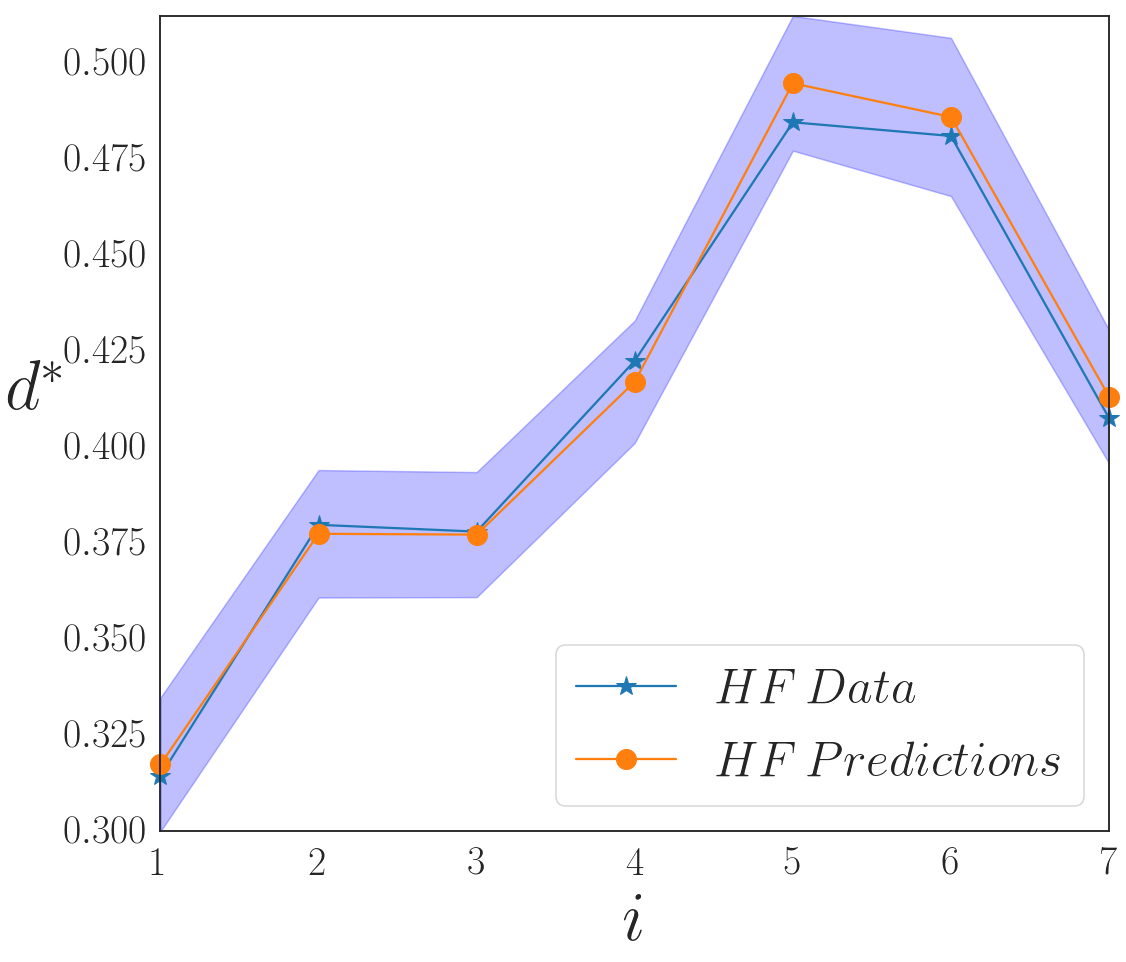

In [44]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

fig , ax = plt.subplots(1,1,figsize = (17,15))
ax.plot(1 + np.arange(Xh_test.shape[0]), Yh_test, marker='*', markersize = 20, clip_on=False)
ax.plot(1 + np.arange(Xh_test.shape[0]), pred_high, marker='o', markersize = 20, clip_on=False)
sp = np.sqrt(var.flatten())
print "Last high-fidelity response predictions:", pred_high
#print Xh_train
print "Last high-fidelity test input:", Xh_test
print "Last high-fidelity test output:", Yh_test
print "Variance for last high response:", var.flatten()
#print sp
lp = pred_high.flatten() - 2.0 * sp
up = pred_high.flatten() + 2.0 * sp
ax.fill_between(1 + np.arange(Xh_test.shape[0]), lp.flatten(), up.flatten(), color='blue',
                      alpha=0.25)
#ax.plot( f_h(Xp), 'k--')
ax.set_xlabel('$i$', fontsize = 70)
ax.set_ylabel('$d^*$', fontsize=70, rotation=0)
#ax.set_title('Predict fast - function')
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.set_label_coords(-0.13, 0.5)
#ax.xaxis.set_label_coords(0.5, -0.08)
ax.legend([r'$HF \, Data$', r'$HF \, Predictions$'], loc='lower right', fontsize = 50)
plt.xlim(1, Xh_test.shape[0])
plt.ylim(np.min(lp),np.max(up))
plt.savefig('prediction_and_observations.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

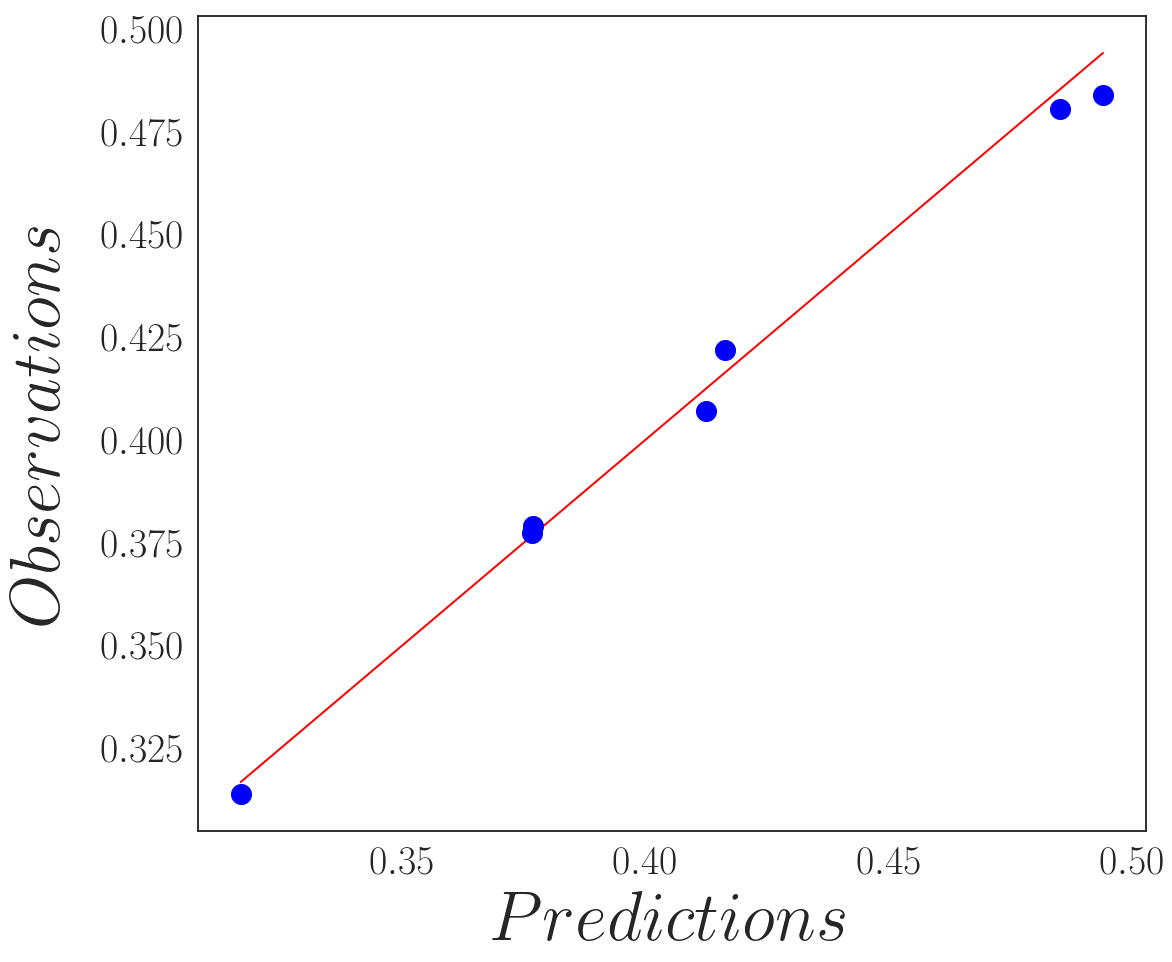

In [38]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

fig , ax = plt.subplots(1,1,figsize = (17,15))
y_range = np.linspace(np.min(pred_high), np.max(pred_high), 50)
ax.plot(y_range, y_range, 'r', lw=2)
#for i in range(0, len(predictions)):
ax.plot(pred_high, Yh_test, 'bo', markersize = 20, clip_on = False)
#ax.plot(predictions[i], Yh_test, 'bo')
ax.set_xlabel(r'$Predictions$', fontsize=70)
ax.set_ylabel(r'$Observations$', fontsize=70)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.set_label_coords(-0.13, 0.5)
#plt.xlim(np.min(pred_high), np.max(pred_high))
#plt.ylim(np.min(Yh_test),np.max(Yh_test))
plt.savefig('prediction_vs_observations.eps', bbox_inches = 'tight', pad_inches = 0)

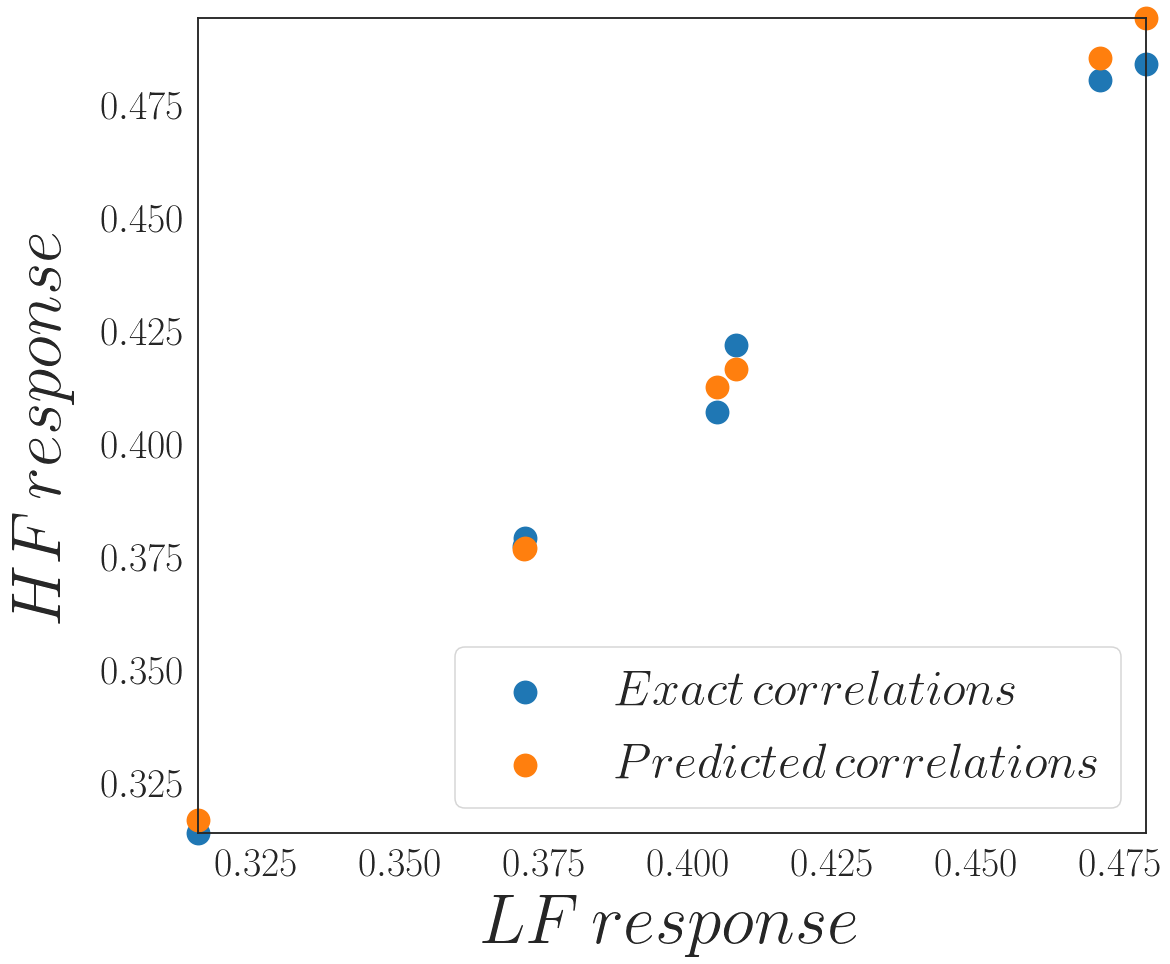

In [39]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

from mpl_toolkits import mplot3d
from matplotlib import rc, rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
rc('text', usetex=True)
#rc('axes', linewidth=2)
rc('font', weight='bold')

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

fig , ax = plt.subplots(1,1,figsize = (17,15))
ax.scatter(mu1, Yh_test, s=500, clip_on = False, label = r'$Exact \, correlations$')
ax.scatter(mu1, mean, s=500, clip_on = False, label = r'$Predicted \, correlations$')
ax.set_xlabel(r'$LF \, response$', fontsize=70)
ax.set_ylabel(r'$HF \, response$', fontsize=70)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.set_label_coords(-0.13, 0.5)
plt.xlim(np.min(mu1), np.max(mu1))
plt.ylim( min(np.min(Yh_test), np.min(mean)), max(np.max(Yh_test), np.max(mean)) )
ax.legend(fontsize = 50, loc = 'lower right')
plt.savefig('correlations.png', bbox_inches = 'tight', pad_inches = 0)

In [41]:
print "R2 score for the werid prediction:", R2_weird

R2 score for the werid prediction: [-0.8604722849862323]


In [42]:
print "Prediction values for the weird case:", weird_predictions

Prediction values for the weird case: [array([[0.42217885],
       [0.41644134],
       [0.27134212],
       [0.27243755],
       [0.27478999],
       [0.31565782],
       [0.49378089]])]
